<img src="../NAWI_Graz_Logo.png" align="right" width=150>

# Notebook 6: Water buckets and explicit Euler

*Developed by Johannes Haas and Raoul Collenteur*


This is the last notebook for this course. So what have we learned so far?
- Basic Python syntax
- Python data types
- Basic mathematical operators
- if/else statements
- basic comparisons
- for-loops
- Python functions
- Making figures using Matplotlib
- Reading and writing csv files
- Basic statistics in Python
- Analyzing data with Pandas

In this Notebook, we will combine many of the things we have learned to create a simple hydrological model.

In [28]:
# Import the python packages needed in this session
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [205]:
# Let's do some repitition here!

# 1. Let's create a Water Bucket Model!

In this notebook we will develop a linear reservoir model, a type of water bucket model that is used a lot in hydrology and groundwater models. See, for examnple, https://distart119.ing.unibo.it/albertonew/?q=node/58. Consider the following conceptualization:

<img src="data/water_bucket.png">

The model balance equation to describe the behaviour of the reservoir is as follows:

$\frac{dS}{dt} = -Q + P - E$

where $Q$ [L/T] is the discharge from the reservoir, P [L/T] the precipitation and E [L/T] actual evaporation. We assume the discharge is a function of the Storage S(t) [L] and the conductivity $k$ [L/T]  leading to the following equation:

$Q(t) = k S(t)$

This equation cannot be solved analytically, and has to be solved numerically. The easiest approach for a numerical solution of this equation is to use the Forward Euler Method, also known as Explicit Euler. This method calculates the state of the system at each time step (S(t)) by looking at the state of the of the system in the previous time step and the rate of the changes:

$S(t + \Delta t) = S(t) - k \Delta t S(t) + P(t) - E(t)$


### 1a. Creating a python function to calculate the water balance

This function can be easily programmed into a Python function and used to simulate 


In [218]:
def water_balance(S, P, E, k):
    """
    Parameters:
    -----------
    S: float
        Storage volume of the previous time step
    P: float
        Rain of the previous time step
    E: float
        Evaporation of the previous time step
    k: float
        Conductivity between zero and infinity.
        
    Returns:
    --------
    S_new: float
        Storage volume at the next time step
    
    """
    Q = k * S
    S_new = S - Q + P - E
    return S_new

### 1b. Let's create some data and empty array to store new data

In [219]:
times = np.arange(100)
S = np.zeros(len(times)+1)
S[0] = 10

P = np.random.rand(len(times)) + 1
E = np.random.rand(len(times))* 0.5 + 1

k = 0.025

### 1c. Use a for-loop to simulate the storage for each time step and plot

(0, 100)

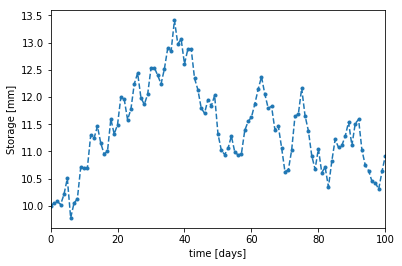

In [220]:
for t in times:
    S[t+1] = water_balance(S[t], P[t], E[t], k)

plt.plot(S, marker=".", linestyle="--")
plt.xlabel("time [days]")
plt.ylabel("Storage [mm]")
plt.xlim(0,len(times))

## Validating the model
The differential equation can be simplified under the condition that P=0 and E=0:

$\frac{dS}{dt} = -k S$

such that an analytical solution can be calculated for the simplified equation. It can be shown (e.g, https://www.wolframalpha.com/input/?i=S%27(t)+%3D+-k+S(t)) that the analytical solution to this problem is as follows:

$ S(t) = S(t_0) \cdot e^{-kt} $

Where $S(t_0)$ is the storage at time t=0. It is always a good idea to try and validate the model you have programmed. In this example, we can compare 

### In-class Exercise: plot the numerical and analytical solution
1. Compute the analytical solution
2. Plot the numerical and analytical solution in one graph
3. Add labels and a legend

**What is the influence of the time step to how accurate the solution is?**

In [221]:
# 1. Compute the analytical solution


# 2. Plot the numerical and analytical solution in one graph


# 3. Add labels and a legend

# 2. Calibrating model in Python
Something that is quite common when making model in Python, is to calibrate the parameters of the model. Python has many packages to do this, including methods to estimate the uncertainty of the parameters. We will shortly look at a basic method to fit a model and estimate the parameters that is available from Scipy. More information is available on: https://docs.scipy.org/doc/scipy-0.10.1/reference/optimize.html#module-scipy.optimize


In [229]:
from scipy.optimize import leastsq

def calculate_storage(k, P, E):
    # Prepare arrays
    times = np.arange(100)
    S = np.zeros(len(times)+1)
    S[0] = 10

    for t in times:
        S[t+1] = water_balance(S[t], P[t], E[t], k)
        
    return S

def residuals(p, P, E, S_meas):
    k = p[0]    
    S = calculate_storage(k, P, E)
    res = S-S_meas
    
    return res

In [230]:
# Test the function
residuals(p0, P, E, S_meas)

array([-0.87907485,  0.06335512, -0.70016191, -0.15273305,  0.14742695,
        0.10636886,  0.51933461,  0.86774304,  0.72324258,  0.33071095,
        0.61901558,  1.10669388,  1.25604958,  1.48257461,  1.63174436,
        1.91023499,  1.55904271,  1.70497402,  2.03358199,  2.28320075,
        2.30210536,  2.2973164 ,  2.69572891,  2.68843312,  2.85580564,
        3.14885094,  2.92290539,  3.69270176,  3.19197391,  3.62859937,
        4.13003325,  4.40822645,  4.44621941,  4.63728751,  3.93082165,
        4.37359938,  4.75179798,  5.09875752,  5.17004182,  4.85831359,
        5.20654049,  5.05545545,  5.49873365,  5.65801886,  5.52206307,
        5.9772596 ,  5.54722613,  5.70777222,  6.58417232,  6.70075283,
        6.34942557,  6.9394712 ,  6.71729072,  6.71837857,  6.38023917,
        7.15729509,  7.26000333,  6.99453464,  7.65898653,  7.03454692,
        7.7843252 ,  7.25224499,  7.79198535,  7.81294151,  7.49668588,
        8.30467149,  7.74092469,  7.61229128,  8.56785887,  7.92

In [231]:
# Let's create some calibration data
S_meas = S + np.random.rand(len(S))

p0=[0.01] # Estimate of the K-value

plsq = leastsq(residuals, p0, args=(P, E, S_meas))

In [232]:
# Let's plot everything together here!

# Final Exercise: Simulating heads and groundwater recharge
In this exercise we will use the linear reservoir model we learned about above to perform some hydrological analyses. Imagine you work at a consultancy firm, and you are asked to provide a rough estimate the groundwater recharge using a linear reservoir model.

to estimate groundwater recharge and use that to simulate the groundwater head.


### 1. Read data from the CSV-files
The data folder contains three csv files for the groundwater levels (`head,csv`), the precipitation (`rain.csv`) and the evaporation (`evap.csv`). 
1. Read all these time series using the read_csv method
2. make sure that the index is a DateTime index and use `squeeze=True` and `dayfirst=True`
3. Plot all three time series (heads in one plot and the precipitation and evaporation in another)

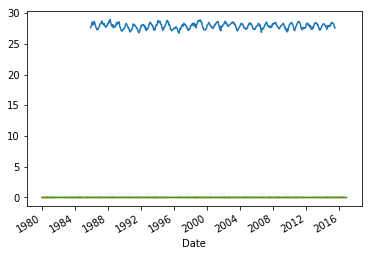

In [206]:
# 1. Read all these time series using the read_csv method
head = pd.read_csv("data/head.csv", parse_dates=True, usecols=[0,1], index_col=0, squeeze=True, dayfirst=True)
rain = pd.read_csv("data/rain.csv", parse_dates=True, usecols=[0,1], index_col=0, squeeze=True, dayfirst=True)
evap = pd.read_csv("data/evap.csv", parse_dates=True, usecols=[0,1], index_col=0, squeeze=True, dayfirst=True)

# 3. Plot all three time series (heads in one plot and the precipitation and evaporation in another)
head.plot()
rain.plot()
evap.plot()

### 2. Define the water balance function and plot against analytical solution
The second step is to define a water balance function similar to the one developed before. Let's imagine that the discharge Q is the actual groundwater recharge that occurs. However, if it rain extremely hard, some water might be lost as surface runoff and not add to the groundwater recharge.

Create a water_balance method like the one we made earlier. However, the following new features have to be added:
- If the rain exceeds `pmax` m/d, the function should delete all precipitation higher than this value using a if/else statement. 
- `pmax` should be implemented as a keyword parameter in the Python function with the default value of 0.04.
- function should return the storage S and the recharge Q

In [207]:
# Define you water_balance method here

def water_balance(S, P, E, k, pmax=0.04):
    """
    Parameters:
    -----------
    S: float
        Storage volume of the previous time step
    P: float
        Rain of the previous time step
    E: float
        Evaporation of the previous time step
    k: float
        Conductivity between zero and infinity.
        
    Returns:
    --------
    S_new: float
        Storage volume at the next time step
    
    """
    if P > 0.04:
        P = 0.04
    Q = k * S
    S_new = S - Q + P - E
    return S_new, Q


### 3. Simulate the storage S and the discharge Q
We will now use the model defined above to simulate the storage S and the dicharge from the linear reservoir Q for the period 2000-2010. 
1. Select the precipitation and evaporation for the period 2000-2010
2. Create empty arrays named `S` and `Q` with the appropriate lengths to store the values
3. Use a for-loop to simulate the storage and discharge. Use a k-value of 0.01.

In [208]:
# 1. Select the precipitation and evaporation for the period 2000-2010
P = rain.loc["2000":"2010"]
E = evap.loc["2000":"2010"]

# 2. Create empty arrays named S and Q with the appropriate lengths to store the values
times = np.arange(len(P))
S = np.zeros(len(times)+1)
S[0] = 0
Q = np.zeros(len(times)+1)

# 3. Use a for-loop to simulate the storage and discharge. Use a k-value of 0.01.
k = 0.01
for t in times:
    S[t+1], Q[[t+1]] = water_balance(S[t], P.iloc[t], E.iloc[t], k)

### 4. Estimate the groundwater level fluctuations from the recharge Q
In this step we will use the groundwater recharge we just estimated to simulate the groundwater levels. To translate the recharge to groundwater level (head) fluctuations, the function `recharge_to_head` is provided. Use this function to estimate the head.

1. Make a Pandas Series of from the numpy array with the estimated head (`head_estimation`)
2. Make a plot of the observed groundwater levels, using black dots
3. Draw the estimated groundwater levels in the same plot
4. Provide labels and a legend.


In [203]:
def recharge_to_head(Q, mean_head=27.5, multiplier=600, n=60):
    # Multiply the head 
    head = Q * multiplier
    # Take a moving average over n days
    head = np.convolve(head, np.ones(n))[:len(head)] / n 
    head = head + mean_head
    return head

head_estimation = recharge_to_head(Q, mean_head=27.5, multiplier=600, n=60)

# 1. Make a Pandas Series of from the numpy array with the estimated head (head_estimation)

# index=pd.date_range("2000-01-01", end="2010-12-31", freq="D")

# 2-4 Plot the different Time Series


### 5. Calculate the annual groundwater recharge Q
As a final step, we need to calculate the annual groundwater recharge and make a bar graph of it.

1. Create a Pandas Series from the Recharge Q with the correct datetime index
2. Use the Pandas method `.resample` to calculate the total (sum) recharge per year
3. Make a bar plot of the yearly recharge values

In [204]:
# 1. Create the Pandas series from the recharge array


# 2. Use pandas resample method to calculate the sum


# 3. make a bar plot

### 6. BONUS: Calibrate the model
You can use scipy's least_squares method to fit some parameters of the model (e.g., mean_head, multiplier, n, k). Try and calibrate one or more of the parameters of the model to obtain the best fit between the observed head and the estimated head. You can use this exercise to compensate for any of the above exercises!